In [ ]:
import odc.stac
from pystac_client import Client
import matplotlib.pyplot as plt
import pandas as pd

# Open catalog
catalog = Client.open(
    "https://storage.googleapis.com/gca-data-public/gca/gca-stac-v6/catalog.json"
)

# Choose a collection
collection_id = "Salinity"  # example
collection = catalog.get_collection(collection_id)

# Get items from the collection
items = list(collection.get_items())
print(f"Found {len(items)} items")

# Explore first item
item = items[0]
print("Item ID:", item.id)
print("Datetime:", item.datetime)
print("Assets:", item.assets.keys(), "\n")

# Explore a specific item
item_id = "cc45y/2030.tif"
item = collection.get_item(item_id)
print("Item ID:", item.id)
print("Datetime:", item.datetime)
print("Assets:", item.assets.keys())


c:\Users\fuentesm\AppData\Local\miniforge3\envs\coclico\Lib\site-packages\pystac_client\client.py:191: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())
c:\Users\fuentesm\AppData\Local\miniforge3\envs\coclico\Lib\site-packages\pystac_client\client.py:410: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")
c:\Users\fuentesm\AppData\Local\miniforge3\envs\coclico\Lib\site-packages\pystac_client\collection_client.py:149: FallbackToPystac: Falling back to pystac. This might be slow.
  root._warn_about_fallback("ITEM_SEARCH")


Found 15 items
Item ID: cc45y/2030.tif
Datetime: 2022-02-22 00:00:00+00:00
Assets: dict_keys(['data', 'visual']) 

Item ID: cc45y/2030.tif
Datetime: 2022-02-22 00:00:00+00:00
Assets: dict_keys(['data', 'visual'])


c:\Users\fuentesm\AppData\Local\miniforge3\envs\coclico\Lib\site-packages\pystac_client\collection_client.py:197: FallbackToPystac: Falling back to pystac. This might be slow.
  root._warn_about_fallback("FEATURES", "ITEM_SEARCH")


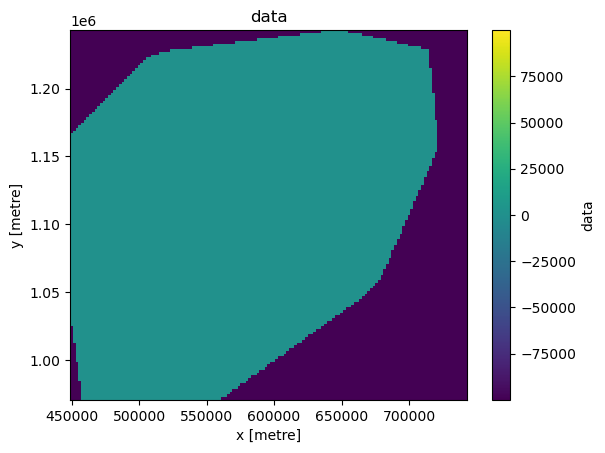

In [26]:
# Load as xarray dataset
ds = odc.stac.load([item])

# Plot the first band
ds_band = list(ds.data_vars)[0]  
ds[ds_band].plot(cmap="viridis")  
plt.title(ds_band)
plt.show()


In [28]:
# Get the asset with key 'visual'
visual_asset = item.assets.get("visual")

if visual_asset is not None:
    print("Found asset 'visual':")
    print("HREF:", visual_asset.href)
    print("Media Type:", visual_asset.media_type)
    print("Title:", visual_asset.title)
    print("Description:", visual_asset.description)
else:
    print("Asset with key 'visual' not found")

Found asset 'visual':
HREF: https://www.international-delta-platform.avi.directory.intra.com/geoserver/idp/wms
Media Type: application/png
Title: cc45y_2030
Description: OGS WMS url
